In [123]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import datasets
from tensorflow.keras import activations
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [101]:
# load dataset
(tmp_train_x, tmp_train_y), (tmp_test_x, tmp_test_y) = datasets.mnist.load_data()

In [102]:
# preprocessing
train_shape = tmp_train_x.shape
test_shape = tmp_test_x.shape
# normalize and add 1 channel for 4th dimension
train_x = tmp_train_x.reshape(train_shape[0], train_shape[1], train_shape[2], 1) / 255
test_x = tmp_test_x.reshape(test_shape[0], test_shape[1], test_shape[2], 1) / 255
train_y = to_categorical(tmp_train_y)
test_y = to_categorical(tmp_test_y)

In [225]:
# model initalization
def max_init():
    model = keras.Sequential()
    model.add(layers.Conv2D(
        10,
        (5, 5),
        input_shape =(28,28,1),
        strides=1,
        kernel_initializer="he_uniform",
        activation='relu'
    )) # 24 x 24 output
    model.add(layers.MaxPooling2D(
        pool_size=(2,2)
    )) # 12 x 12 output
    model.add(layers.Flatten())
    model.add(layers.Dense(25, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation = 'softmax'))
    opt = optimizers.SGD(lr=.01, momentum=.9) 
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

def max_wide_init():
    model = keras.Sequential()
    model.add(layers.Conv2D(
        10,
        (5, 5),
        input_shape =(28,28,1),
        strides=1,
        kernel_initializer="he_uniform",
        activation='relu'
    )) # 24 x 24 output
    model.add(layers.MaxPooling2D(
        pool_size=(2,2)
    )) # 12 x 12 output
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation = 'softmax'))
    opt = optimizers.SGD(lr=.01, momentum=.9) 
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

def max_deep_wide_init():
    model = keras.Sequential()
    model.add(layers.Conv2D(
        10,
        (5, 5),
        input_shape =(28,28,1),
        strides=1,
        kernel_initializer="he_uniform",
        activation='relu'
    )) # 24 x 24 output
    model.add(layers.MaxPooling2D(
        pool_size=(2,2)
    )) # 12 x 12 output
    model.add(layers.Conv2D(
        5,
        (5, 5),
        strides=1,
        kernel_initializer="he_uniform",
        activation='relu'
    )) # 8 x 8 output
    model.add(layers.MaxPooling2D(
    pool_size=(2,2)
    )) # 4 x 4 output
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation = 'softmax'))
    opt = optimizers.SGD(lr=.01, momentum=.9) 
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

def avg_init():
    model = keras.Sequential()
    model.add(layers.Conv2D(
        10,
        (5, 5),
        input_shape =(28,28,1),
        strides=1,
        kernel_initializer="he_uniform",
        activation='relu'
    )) # 24 x 24 output
    model.add(layers.AveragePooling2D(
        pool_size=(2,2)
    )) # 12 x 12 output
    model.add(layers.Flatten())
    model.add(layers.Dense(25, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation = 'softmax'))
    opt = optimizers.SGD(lr=.01, momentum=.9) 
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

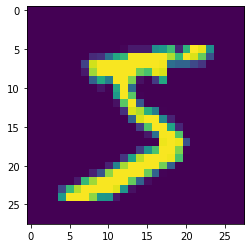

In [95]:
plt.imshow(train_x[0])

In [214]:
max_model = max_init()
print(train_x.shape)
history = max_model.fit(train_x, train_y, batch_size=1000, epochs=20, validation_data=(test_x, test_y), verbose=2) 


(60000, 28, 28, 1)
Epoch 1/10
60/60 - 8s - loss: 0.9480 - accuracy: 0.6999 - val_loss: 0.3800 - val_accuracy: 0.8885
Epoch 2/10
60/60 - 7s - loss: 0.3473 - accuracy: 0.8996 - val_loss: 0.2982 - val_accuracy: 0.9124
Epoch 3/10
60/60 - 8s - loss: 0.2883 - accuracy: 0.9161 - val_loss: 0.2550 - val_accuracy: 0.9258
Epoch 4/10
60/60 - 7s - loss: 0.2498 - accuracy: 0.9277 - val_loss: 0.2190 - val_accuracy: 0.9361
Epoch 5/10
60/60 - 7s - loss: 0.2183 - accuracy: 0.9372 - val_loss: 0.2000 - val_accuracy: 0.9437
Epoch 6/10
60/60 - 7s - loss: 0.1967 - accuracy: 0.9428 - val_loss: 0.1681 - val_accuracy: 0.9523
Epoch 7/10
60/60 - 7s - loss: 0.1724 - accuracy: 0.9503 - val_loss: 0.1564 - val_accuracy: 0.9554
Epoch 8/10
60/60 - 8s - loss: 0.1562 - accuracy: 0.9548 - val_loss: 0.1385 - val_accuracy: 0.9596
Epoch 9/10
60/60 - 7s - loss: 0.1431 - accuracy: 0.9591 - val_loss: 0.1258 - val_accuracy: 0.9630
Epoch 10/10
60/60 - 7s - loss: 0.1294 - accuracy: 0.9628 - val_loss: 0.1159 - val_accuracy: 0.9654


In [211]:
avg_model = avg_init()
print(train_x.shape)
history = avg_model.fit(train_x, train_y, batch_size=1000, epochs=20, validation_data=(test_x, test_y), verbose=2) 


(60000, 28, 28, 1)
Epoch 1/10
60/60 - 9s - loss: 1.2156 - accuracy: 0.6331 - val_loss: 0.4255 - val_accuracy: 0.8747
Epoch 2/10
60/60 - 7s - loss: 0.3835 - accuracy: 0.8886 - val_loss: 0.3352 - val_accuracy: 0.9031
Epoch 3/10
60/60 - 7s - loss: 0.3263 - accuracy: 0.9063 - val_loss: 0.3065 - val_accuracy: 0.9132
Epoch 4/10
60/60 - 7s - loss: 0.2988 - accuracy: 0.9138 - val_loss: 0.2773 - val_accuracy: 0.9217
Epoch 5/10
60/60 - 7s - loss: 0.2792 - accuracy: 0.9197 - val_loss: 0.2645 - val_accuracy: 0.9245
Epoch 6/10
60/60 - 7s - loss: 0.2635 - accuracy: 0.9236 - val_loss: 0.2471 - val_accuracy: 0.9314
Epoch 7/10
60/60 - 7s - loss: 0.2477 - accuracy: 0.9283 - val_loss: 0.2401 - val_accuracy: 0.9307
Epoch 8/10
60/60 - 6s - loss: 0.2365 - accuracy: 0.9317 - val_loss: 0.2245 - val_accuracy: 0.9355
Epoch 9/10
60/60 - 7s - loss: 0.2227 - accuracy: 0.9368 - val_loss: 0.2132 - val_accuracy: 0.9416
Epoch 10/10
60/60 - 7s - loss: 0.2125 - accuracy: 0.9390 - val_loss: 0.2066 - val_accuracy: 0.9405


In [217]:
max_wide_model = max_wide_init()
history = max_wide_model.fit(train_x, train_y, batch_size=1000, epochs=20, validation_data=(test_x, test_y), verbose=2) 


Epoch 1/20
60/60 - 8s - loss: 0.7506 - accuracy: 0.7670 - val_loss: 0.3121 - val_accuracy: 0.9082
Epoch 2/20
60/60 - 8s - loss: 0.2847 - accuracy: 0.9171 - val_loss: 0.2335 - val_accuracy: 0.9325
Epoch 3/20
60/60 - 8s - loss: 0.2303 - accuracy: 0.9339 - val_loss: 0.2033 - val_accuracy: 0.9406
Epoch 4/20
60/60 - 8s - loss: 0.1945 - accuracy: 0.9432 - val_loss: 0.1723 - val_accuracy: 0.9502
Epoch 5/20
60/60 - 7s - loss: 0.1693 - accuracy: 0.9511 - val_loss: 0.1543 - val_accuracy: 0.9544
Epoch 6/20
60/60 - 8s - loss: 0.1482 - accuracy: 0.9570 - val_loss: 0.1328 - val_accuracy: 0.9622
Epoch 7/20
60/60 - 8s - loss: 0.1323 - accuracy: 0.9620 - val_loss: 0.1235 - val_accuracy: 0.9625
Epoch 8/20
60/60 - 7s - loss: 0.1196 - accuracy: 0.9654 - val_loss: 0.1102 - val_accuracy: 0.9675
Epoch 9/20
60/60 - 7s - loss: 0.1103 - accuracy: 0.9685 - val_loss: 0.1032 - val_accuracy: 0.9683
Epoch 10/20
60/60 - 7s - loss: 0.1008 - accuracy: 0.9714 - val_loss: 0.0946 - val_accuracy: 0.9712
Epoch 11/20
60/60 -

In [219]:
max_deep_wide_model = max_deep_wide_init()
history = max_deep_wide_model.fit(train_x, train_y, batch_size=1000, epochs=20, validation_data=(test_x, test_y), verbose=2) 


Epoch 1/20
60/60 - 10s - loss: 1.3094 - accuracy: 0.5644 - val_loss: 0.3751 - val_accuracy: 0.8890
Epoch 2/20
60/60 - 9s - loss: 0.3097 - accuracy: 0.9056 - val_loss: 0.2194 - val_accuracy: 0.9372
Epoch 3/20
60/60 - 9s - loss: 0.2111 - accuracy: 0.9354 - val_loss: 0.1657 - val_accuracy: 0.9515
Epoch 4/20
60/60 - 9s - loss: 0.1666 - accuracy: 0.9498 - val_loss: 0.1335 - val_accuracy: 0.9618
Epoch 5/20
60/60 - 10s - loss: 0.1399 - accuracy: 0.9589 - val_loss: 0.1171 - val_accuracy: 0.9656
Epoch 6/20
60/60 - 10s - loss: 0.1208 - accuracy: 0.9639 - val_loss: 0.1013 - val_accuracy: 0.9694
Epoch 7/20
60/60 - 12s - loss: 0.1104 - accuracy: 0.9661 - val_loss: 0.0934 - val_accuracy: 0.9707
Epoch 8/20
60/60 - 10s - loss: 0.1011 - accuracy: 0.9692 - val_loss: 0.0845 - val_accuracy: 0.9738
Epoch 9/20
60/60 - 10s - loss: 0.0942 - accuracy: 0.9710 - val_loss: 0.0826 - val_accuracy: 0.9753
Epoch 10/20
60/60 - 10s - loss: 0.0887 - accuracy: 0.9726 - val_loss: 0.0791 - val_accuracy: 0.9761
Epoch 11/20


In [220]:
model = max_deep_wide_model

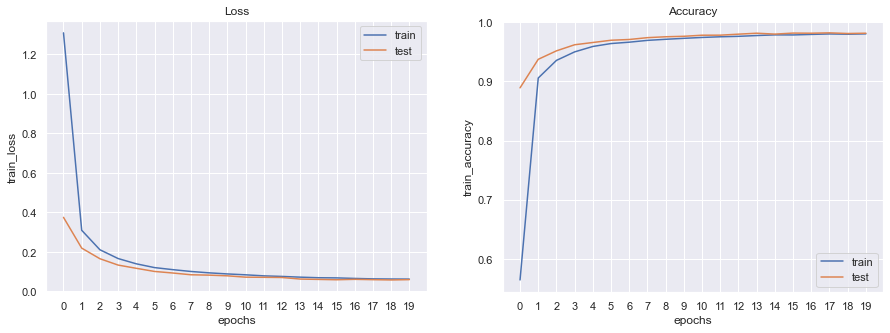

In [221]:
sns.set_theme()
hist = history.history
fig, axis = plt.subplots(1, 2)
x = [i for i in range(len(hist['loss']))]
df = pd.DataFrame({"x":x,
                   "train_loss":hist['loss'],
                   "test_loss":hist["val_loss"],
                   "train_accuracy":hist["accuracy"],
                   "test_accuracy":hist["val_accuracy"]})
p1 = sns.lineplot(ax=axis[0], data=df, x="x", y="train_loss", label="train")
sns.lineplot(ax = axis[0], data=df, x="x", y="test_loss", label="test")
p1.set(
    xticks=x,
    title="Loss",
    xlabel="epochs",
)

p2 = sns.lineplot(ax=axis[1], data=df, x="x", y="train_accuracy", label="train")
sns.lineplot(ax = axis[1], data=df, x="x", y="test_accuracy", label="test")
p2.set(
    xticks=x,
    title="Accuracy",
    xlabel="epochs",
)
fig.set_figheight(5)
fig.set_figwidth(15)
p1.legend(loc="upper right")
pass

In [224]:
print(hist["accuracy"][-1]) # 98% Accuracy
hist["val_accuracy"][-1] # 98% Accuracy

0.9802166819572449


0.9812999963760376